# Data Cleaning Notebook - Titanic Dataset

In [1]:
## Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the Dataset
data = pd.read_csv('Titanic-Dataset.csv')

In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Cleaning

In [6]:
# Fill missing values in "Age" with median
data['Age'].fillna(data['Age'].median(), inplace = True)

/var/folders/3q/r2zc74911hn2f967w656zszm0000gn/T/ipykernel_75967/2511299876.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace = True)


In [7]:
data["Age"].isnull().sum()

0

In [8]:
# Fill missing values in 'Embarked' column with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

/var/folders/3q/r2zc74911hn2f967w656zszm0000gn/T/ipykernel_75967/920014332.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [9]:
# Drop the Cabin column
data.drop('Cabin', axis=1, inplace=True)

In [10]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

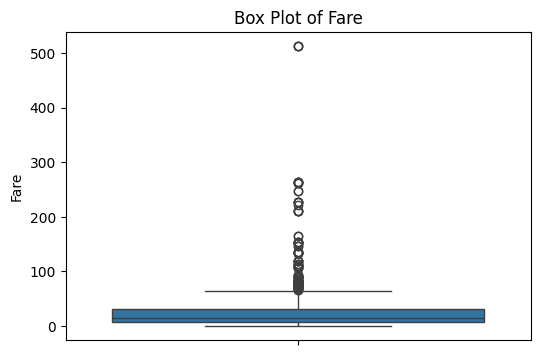

In [11]:
import seaborn as sns

# Identify outliers in 'Fare' column using box plots
plt.figure(figsize=(6, 4))
sns.boxplot(data['Fare'])
plt.title('Box Plot of Fare')
plt.show()


In [12]:
# Handle outliers in 'Fare' column using winsorization
fare_q1 = data['Fare'].quantile(0.25)
fare_q3 = data['Fare'].quantile(0.75)
fare_iqr = fare_q3 - fare_q1
fare_lower_bound = fare_q1 - 1.5 * fare_iqr
fare_upper_bound = fare_q3 + 1.5 * fare_iqr

data['Fare'] = np.where(data['Fare'] < fare_lower_bound, fare_lower_bound,
                        np.where(data['Fare'] > fare_upper_bound, fare_upper_bound, data['Fare']))

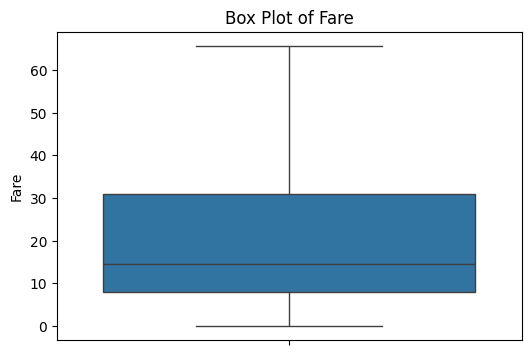

In [13]:
# Check for outliers in 'Fare' column
plt.figure(figsize=(6, 4))
sns.boxplot(data['Fare'])
plt.title('Box Plot of Fare')
plt.show()

In [14]:
# Drop passenger id and ticket columns
data.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)

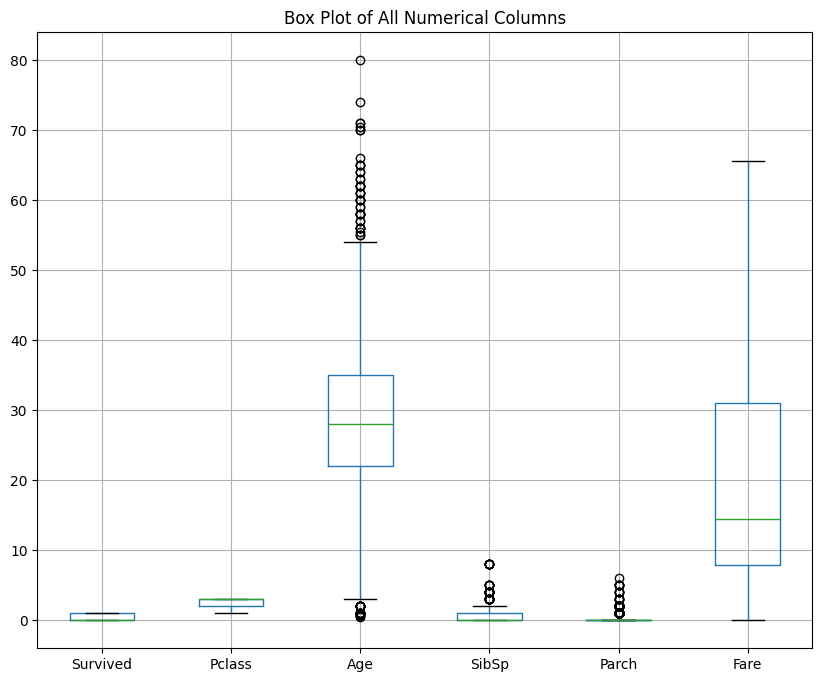

In [15]:
# Check outliers for all other numerical columns
plt.figure(figsize=(10, 8))
data.boxplot()
plt.title('Box Plot of All Numerical Columns')
plt.show()

In [16]:
# Handle outliers in 'Age' column using winsorization
age_q1 = data['Age'].quantile(0.25)

age_q3 = data['Age'].quantile(0.75)

age_iqr = age_q3 - age_q1

age_lower_bound = age_q1 - 1.5 * age_iqr

age_upper_bound = age_q3 + 1.5 * age_iqr

data['Age'] = np.where(data['Age'] < age_lower_bound, age_lower_bound,
                        np.where(data['Age'] > age_upper_bound, age_upper_bound, data['Age']))


In [17]:
# handle outliers in 'SibSp' column using winsorization
sibsp_q1 = data['SibSp'].quantile(0.25)
sibsp_q3 = data['SibSp'].quantile(0.75)
sibsp_iqr = sibsp_q3 - sibsp_q1
sibsp_lower_bound = sibsp_q1 - 1.5 * sibsp_iqr
sibsp_upper_bound = sibsp_q3 + 1.5 * sibsp_iqr
data['SibSp'] = np.where(data['SibSp'] < sibsp_lower_bound, sibsp_lower_bound,
                        np.where(data['SibSp'] > sibsp_upper_bound, sibsp_upper_bound, data['SibSp']))


In [18]:
# Handle outliers in 'Parch' column using winsorization
parch_q1 = data['Parch'].quantile(0.25)
parch_q3 = data['Parch'].quantile(0.75)
parch_iqr = parch_q3 - parch_q1
parch_lower_bound = parch_q1 - 1.5 * parch_iqr
parch_upper_bound = parch_q3 + 1.5 * parch_iqr
data['Parch'] = np.where(data['Parch'] < parch_lower_bound, parch_lower_bound,
                        np.where(data['Parch'] > parch_upper_bound, parch_upper_bound, data['Parch']))

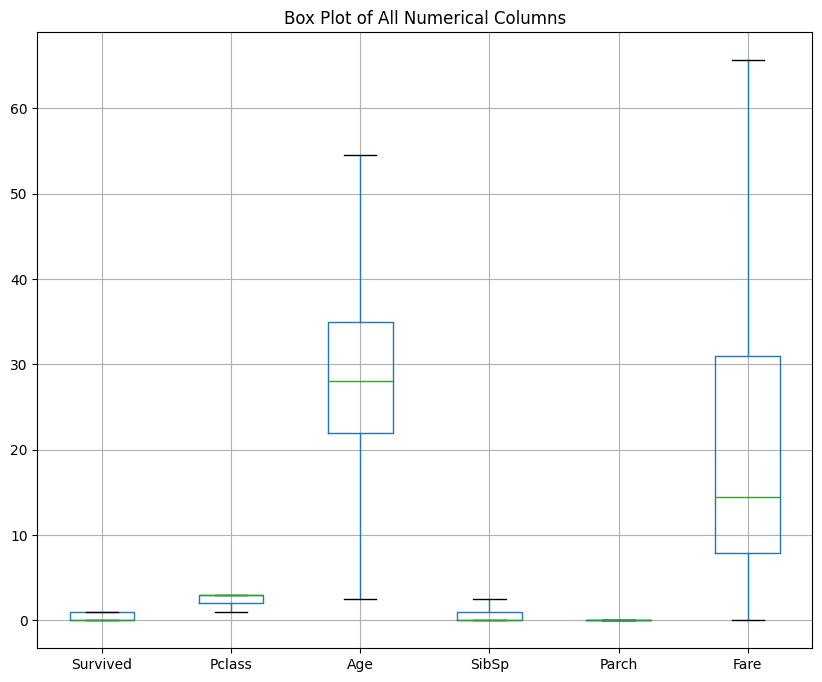

In [19]:
# Check for outliers in all columns
plt.figure(figsize=(10, 8))
data.boxplot()
plt.title('Box Plot of All Numerical Columns')
plt.show()


In [20]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,65.6344,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,8.0500,S


In [21]:
# Convert 'Sex' column to numeric using label encoding
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [22]:
# Convert 'Embarked' column to numeric using one-hot encoding
data = pd.get_dummies(data, columns=['Embarked'], prefix='Embarked')

In [23]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1.0,0.0,7.2500,False,False,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1.0,0.0,65.6344,True,False,False
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0.0,0.0,7.9250,False,False,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1.0,0.0,53.1000,False,False,True
4,0,3,"Allen, Mr. William Henry",0,35.0,0.0,0.0,8.0500,False,False,True


In [24]:
data.duplicated().sum()

0

In [25]:
data.isin(["?", "NA", "N/A", "na", "n/a", "missing", "x", "X", "NULL", "null", "None", "none", "NoneType", "nonetype", "NaN", "nan", "NAN", "NaT", "nat", ""]).sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

The Titanic dataset is now clean and ready for analysis.

In [26]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1.0,0.0,7.2500,False,False,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1.0,0.0,65.6344,True,False,False
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0.0,0.0,7.9250,False,False,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1.0,0.0,53.1000,False,False,True
4,0,3,"Allen, Mr. William Henry",0,35.0,0.0,0.0,8.0500,False,False,True
